<a href="https://colab.research.google.com/github/afelper/BBB/blob/main/Gastos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**
## Proyecto para la gestion de gastos personales, permitiendo identificar las categorias de mayor gastos y que se puedan ahorrar.

# 1) Importar librerias

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





# 2) Leer Datos

In [6]:
datos = pd.read_excel("gastos.xlsx")
print(datos.head())

      Clase      Tipo Prioridad       Categoria      Fecha      Valor
0   Ingreso   Ingreso      Alta         Salario 2024-08-01  3600000.0
1  Ingresos  Ingresos      Alta         Soporte 2024-08-02  2300000.0
2    Gastos    Gastos      Alta        Arriendo 2024-08-03   300000.0
3       NaN       NaN       NaN             NaN        NaT        NaN
4    Gastos    Gastos      Alta  Administracion 2024-08-04   550000.0


# 3) Consultar metadatos

In [8]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Clase      100 non-null    object        
 1   Tipo       99 non-null     object        
 2   Prioridad  99 non-null     object        
 3   Categoria  99 non-null     object        
 4   Fecha      99 non-null     datetime64[ns]
 5   Valor      99 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.0+ KB
None


In [9]:
print(datos.describe())

                               Fecha         Valor
count                             99  9.900000e+01
mean   2024-09-16 05:05:27.272727296  3.565505e+05
min              2024-08-01 00:00:00  1.500000e+04
25%              2024-08-25 12:00:00  5.000000e+04
50%              2024-09-17 00:00:00  1.000000e+05
75%              2024-10-08 12:00:00  3.200000e+05
max              2024-10-25 00:00:00  3.600000e+06
std                              NaN  7.035425e+05


# 4) Limpiar Datos

In [12]:
datos.dropna(inplace=True)
datos.drop_duplicates(inplace=True)


# 5) Procesar los Datos

In [13]:
gastos = datos.groupby("Clase")["Valor"].sum()
print(gastos)

Clase
Gastos      18898500.0
Ingreso      6900000.0
Ingresos     9500000.0
Name: Valor, dtype: float64


# 6) Graficar Gastos de Torta

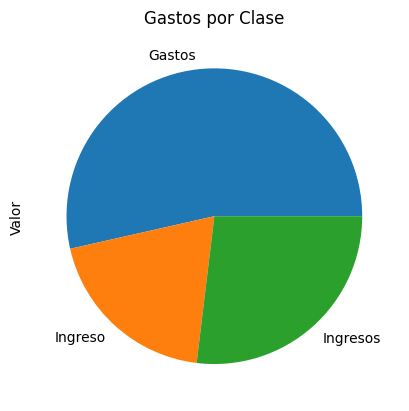

In [17]:
gastos.plot(kind="pie")
plt.title("Gastos por Clase")
plt.show()

# 7) Agrupar por Categorías

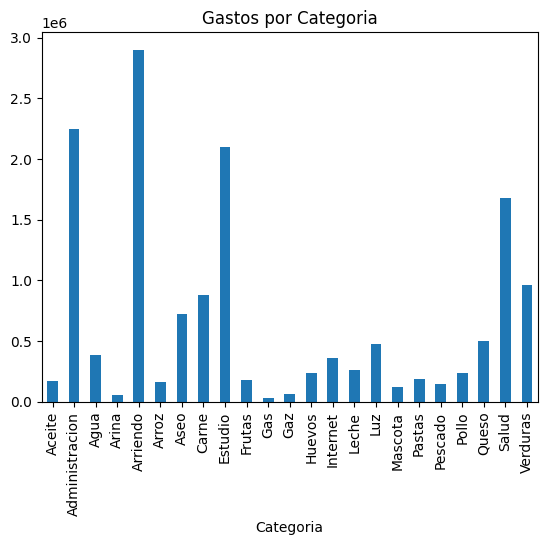

In [36]:
prioridad = datos[datos["Clase"].isin(["Gastos"]) & datos["Prioridad"].isin(["Alta"])]
#print(prioridad)
categorias = prioridad.groupby("Categoria")["Valor"].sum()
categorias.plot(kind="bar")
plt.title("Gastos por Categoria")
plt.show()
